In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [845]:
loan=pd.read_csv("Train_Set_90621.csv")
loan


,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status
0,1020200001,Bank_Name_316,Private,12-10-2005,Business_Name_10007,Uttar Pradesh,525161,2005,1.0,219,...,18550000,25650,1,3,N,N,0,0,13912500,0
1,1020200002,Bank_Name_1062,Govt,21-11-2006,Business_Name_130906,Uttar Pradesh,1231,2006,1.0,71,...,2450000,0,1,0,Y,N,0,2369500,1225000,1
2,1020200003,Bank_Name_39,Private,28-11-2007,Business_Name_105953,Uttar Pradesh,322442,2007,2.0,84,...,1750000,0,2,2,Y,N,0,0,1487500,0
3,1020200004,Bank_Name_3,Govt,18-04-2009,Business_Name_103197,Kerala,1231,2009,1.0,300,...,38850000,1,1,0,N,N,0,0,29137500,0
4,1020200005,Bank_Name_126,Govt,23-11-2002,Business_Name_118932,Delhi,1231,2002,2.0,153,...,2800000,1,2,0,N,Y,0,0,2380000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195113,1020395114,Bank_Number_526,Govt,10-07-2012,Business_Name_3633,Haryana,240220,2012,1.0,60,...,3500000,0,2,0,N,N,0,0,3150000,0
195114,1020395115,Bank_Name_37174,Private,09-11-2004,Business_Name_171105,Delhi,533721,2004,1.0,60,...,3500000,1,0,0,N,N,0,0,2800000,0
195115,1020395116,Bank_Name_26837,Govt,08-12-2010,Business_Name_160768,Uttar Pradesh,1231,2010,1.0,40,...,2450000,0,1,0,Y,N,0,2324210,1225000,1
195116,1020395117,Bank_Number_91,Govt,23-09-2011,Business_Name_85652,Delhi,493440,2011,1.0,60,...,700000,1,1,0,N,N,0,0,350000,0


In [846]:
loan.isnull().sum()

Application ID                      0
Bank Masked                        80
Bank Type                          80
Approved_Timestamp                426
Name Masked                         1
Business Owner State                3
Business_Industry_Type_Code         0
Approved_Year                       0
New Business                       36
Term                                0
BankState                          81
Interest Rate                       0
Employees                           0
Gross Disbursed Amount              0
Term_years                          0
Jobs Retained                       0
Male to Female Employees Ratio      0
Expected Company Income             3
Funds available with company        0
Gross_Apprv_Amount                  0
Company Branch Code                 0
City or Rural                       0
Jobs Generated                      0
Carry-forward Credit              978
Documents Provided                552
Balance Left                        0
Amount Defau

In [847]:
loan['Application ID'].nunique()

195118

In [848]:
loan['Name Masked'].nunique()

150526

In [849]:
loan['Name Masked'].value_counts()

Business_Name_39        91
Business_Name_355       30
Business_Name_2404      28
Business_Name_1807      28
Business_Name_2602      27
                        ..
Business_Name_157164     1
Business_Name_156067     1
Business_Name_132900     1
Business_Name_158185     1
Business_Name_76294      1
Name: Name Masked, Length: 150526, dtype: int64

In [850]:
l=loan.drop('Application ID',axis=1)

In [851]:
dups = l.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(l.shape)

Number of duplicate rows = 0
(195118, 28)


In [852]:
loan.shape

(195118, 29)

In [853]:
loan['Bank Masked'].nunique()

42529

In [854]:
loan['Name Masked'].nunique()

150526

In [855]:
loan['Default_Status'].value_counts(normalize=True)

0    0.819402
1    0.180598
Name: Default_Status, dtype: float64

In [856]:
loan[loan['BankState'].isnull()]

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status
469,1020200470,NaN,NaN,19-02-2009,Business_Name_11723,Tamil Nadu,1230,2009,1.0,169,...,70000000,1,1,0,N,N,0,68637450,52500000,0
5213,1020205214,NaN,NaN,10-10-2009,Business_Name_37423,Maharashtra,449540,2009,1.0,22,...,1750000,0,1,3,N,N,0,615720,1487500,0
9094,1020209095,NaN,NaN,29-10-2008,Business_Name_83240,Delhi,341144,2008,1.0,54,...,6958000,1,1,1,N,N,0,5632060,3479000,0
12026,1020212027,NaN,NaN,25-01-2009,Business_Name_45218,Maharashtra,1230,2009,2.0,70,...,700000,0,1,0,N,N,0,678370,595000,0
16279,1020216280,NaN,NaN,29-11-2009,Business_Name_63743,Haryana,622540,2009,1.0,120,...,14000000,0,0,0,N,N,0,0,11900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185810,1020385811,NaN,NaN,03-08-2009,Business_Name_24272,Haryana,114220,2009,1.0,62,...,5250000,0,1,0,N,N,0,4629100,2625000,0
187349,1020387350,NaN,NaN,06-01-2009,Business_Name_64812,Delhi,1230,2009,1.0,43,...,3500000,1,1,3,Y,N,0,2800000,1750000,1
187872,1020387873,NaN,NaN,09-08-2007,Business_Name_80404,Delhi,1230,2007,1.0,55,...,4200000,0,0,0,N,N,0,3260320,3780000,1
187931,1020387932,NaN,NaN,10-01-2008,Business_Name_15943,Uttar Pradesh,1230,2008,1.0,63,...,2100000,1,0,0,N,N,0,1518370,1890000,0


In [857]:
loan[loan['Business Owner State']==loan['BankState']][['BankState','Business Owner State']]

,BankState,Business Owner State
0,Uttar Pradesh,Uttar Pradesh
1,Uttar Pradesh,Uttar Pradesh
5,Maharashtra,Maharashtra
6,Delhi,Delhi
8,Haryana,Haryana
...,...,...
195112,Haryana,Haryana
195113,Haryana,Haryana
195114,Delhi,Delhi
195115,Uttar Pradesh,Uttar Pradesh


In [858]:
for index,value in loan['BankState'].iteritems():
    if pd.isnull(value):
        loan.loc[index,'BankState']=loan.loc[index,'Business Owner State']

In [859]:
loan[loan['BankState'].isnull()]

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status


In [860]:
loan[loan['BankState']=='0']

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status
348,1020200349,Bank_Name_47161,Govt,03-05-2005,Business_Name_181092,Maharashtra,1231,2005,1.0,84,...,3500000,0,1,0,Y,N,0,0,1750000,0
2410,1020202411,Bank_Name_24048,Private,03-03-2002,Business_Name_157979,Maharashtra,562971,2002,1.0,240,...,36820000,1,2,21,N,N,0,0,36820000,0
4773,1020204774,Bank_Name_43672,Govt,20-06-2003,Business_Name_177603,Uttar Pradesh,1231,2003,1.0,288,...,17710000,1,1,8,N,N,0,0,13282500,0
4811,1020204812,Bank_Name_15700,Private,30-07-2009,Business_Name_149631,Maharashtra,622441,2009,2.0,84,...,6300000,1,1,0,N,N,0,0,5040000,0
9206,1020209207,Bank_Name_36746,Govt,22-09-2004,Business_Name_170677,Haryana,1231,2004,1.0,84,...,9450000,1,2,0,N,Y,0,0,8032500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188603,1020388604,Bank_Name_36725,Private,09-11-2006,Business_Name_170656,Maharashtra,445361,2006,1.0,50,...,2100000,0,1,4,Y,N,0,1715000,1050000,1
192008,1020392009,Bank_Name_48310,Govt,13-12-2009,Business_Name_182241,Delhi,1231,2009,1.0,120,...,25970000,1,1,0,N,N,0,0,19477500,0
192754,1020392755,Bank_Name_32310,Govt,12-11-2003,Business_Name_166241,Maharashtra,1231,2003,1.0,84,...,574000,1,2,0,Y,N,0,0,287000,0
193685,1020393686,Bank_Name_9131,Govt,14-09-2007,Business_Name_143062,Haryana,1231,2007,1.0,84,...,1750000,0,1,1,N,N,0,0,1487500,0


In [861]:
for index in range(0,len(loan)):
    if (loan.loc[index,'BankState']=='0'):
        loan.loc[index,'BankState']=loan.loc[index,'Business Owner State']

In [862]:
loan[loan['BankState']=='0']

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status


In [863]:
loan[loan['Business Owner State'].isnull()]

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status
64564,1020264565,Bank_Name_746,Private,18-10-2014,Business_Name_110782,NaN,236841,2014,1.0,84,...,3500000,0,1,0,Y,N,0,0,1750000,0
120883,1020320884,Bank_Name_1430,Private,13-08-2006,Business_Name_94436,NaN,812423,2006,1.0,7,...,2450000,1,1,0,Y,N,0,2450000,1225000,1
175084,1020375085,Bank_Name_42292,Govt,05-03-2012,Business_Name_176223,NaN,1231,2012,2.0,60,...,560000,0,2,0,N,N,0,0,280000,0


In [864]:
for index,value in loan['Business Owner State'].iteritems():
    if pd.isnull(value):
        loan.loc[index,'Business Owner State']=loan.loc[index,'BankState']

In [865]:
loan[loan['Business Owner State'].isnull()]

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status


In [866]:
loan[loan['Bank Masked'].isnull()][['BankState','Bank Masked']]

,BankState,Bank Masked
469,Tamil Nadu,NaN
5213,Maharashtra,NaN
9094,Delhi,NaN
12026,Maharashtra,NaN
16279,Haryana,NaN
...,...,...
185810,Haryana,NaN
187349,Delhi,NaN
187872,Delhi,NaN
187931,Uttar Pradesh,NaN


In [867]:
loan['Bank Masked'].value_counts()

Bank_Name_42       9133
Bank_Name_3        6688
Bank_Number_13     6021
Bank_Name_11       4903
Bank_Number_37     4436
                   ... 
Bank_Name_11353       1
Bank_Name_16535       1
Bank_Name_32834       1
Bank_Name_22155       1
Bank_Name_27983       1
Name: Bank Masked, Length: 42529, dtype: int64

In [868]:
xcols=[]
for feature in loan.columns: 
    if loan[feature].dtype == 'object':
        xcols.append(feature)
xcols 

['Bank Masked',
 'Bank Type',
 'Approved_Timestamp',
 'Name Masked',
 'Business Owner State',
 'BankState',
 'Carry-forward Credit',
 'Documents Provided']

In [869]:
xcols.remove('Bank Masked')
xcols.remove('Name Masked')
xcols.remove('Approved_Timestamp')

In [870]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(loan[cat_column].value_counts())
    sns.countplot(x=cat_column, data=loan, palette='pastel')
    plt.show()
    print("       ")

Details of Bank Type
----------------------------------------------------------------
Private    130150
Govt        64888
Name: Bank Type, dtype: int64


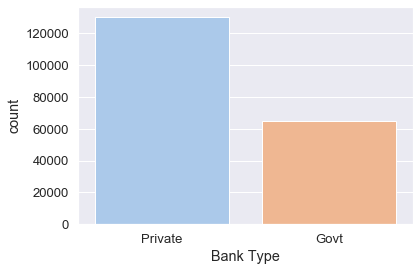

       
Details of Business Owner State
----------------------------------------------------------------
Delhi            58547
Haryana          56421
Maharashtra      48089
Uttar Pradesh    24167
Orissa            2604
Tamil Nadu        2040
Uttarakhand       1293
Karnataka          798
Punjab             616
Kerala             543
Name: Business Owner State, dtype: int64


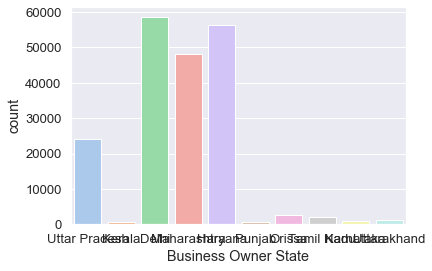

       
Details of BankState
----------------------------------------------------------------
Delhi            74056
Maharashtra      60376
Haryana          39367
Uttar Pradesh    16091
Orissa            1997
Tamil Nadu         961
Uttarakhand        800
Karnataka          671
Punjab             469
Kerala             319
Goa                 11
Name: BankState, dtype: int64


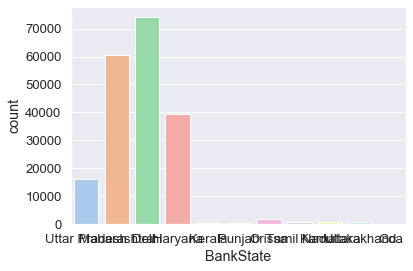

       
Details of Carry-forward Credit
----------------------------------------------------------------
N    147350
Y     46790
Name: Carry-forward Credit, dtype: int64


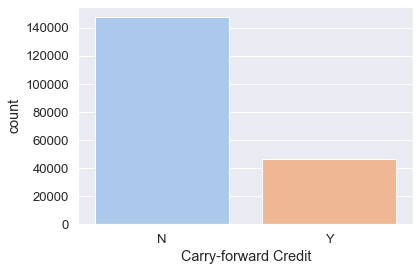

       
Details of Documents Provided
----------------------------------------------------------------
N    170021
Y     24545
Name: Documents Provided, dtype: int64


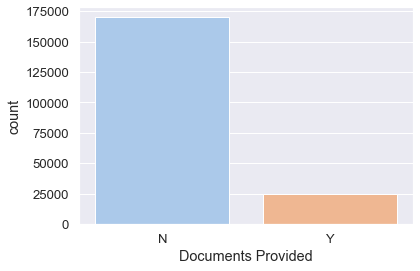

In [871]:
for x in xcols:
    univariateAnalysis_category(x)

In [872]:
cols=[]
for feature in loan.columns: 
    if loan[feature].dtype != 'object':
        cols.append(feature)
cols 

['Application ID',
 'Business_Industry_Type_Code',
 'Approved_Year',
 'New Business',
 'Term',
 'Interest Rate',
 'Employees',
 'Gross Disbursed Amount',
 'Term_years',
 'Jobs Retained',
 'Male to Female Employees Ratio',
 'Expected Company Income',
 'Funds available with company',
 'Gross_Apprv_Amount',
 'Company Branch Code',
 'City or Rural',
 'Jobs Generated',
 'Balance Left',
 'Amount Defaulted',
 'Final_Appved_Amount',
 'Default_Status']

In [873]:
cols.remove('Application ID')

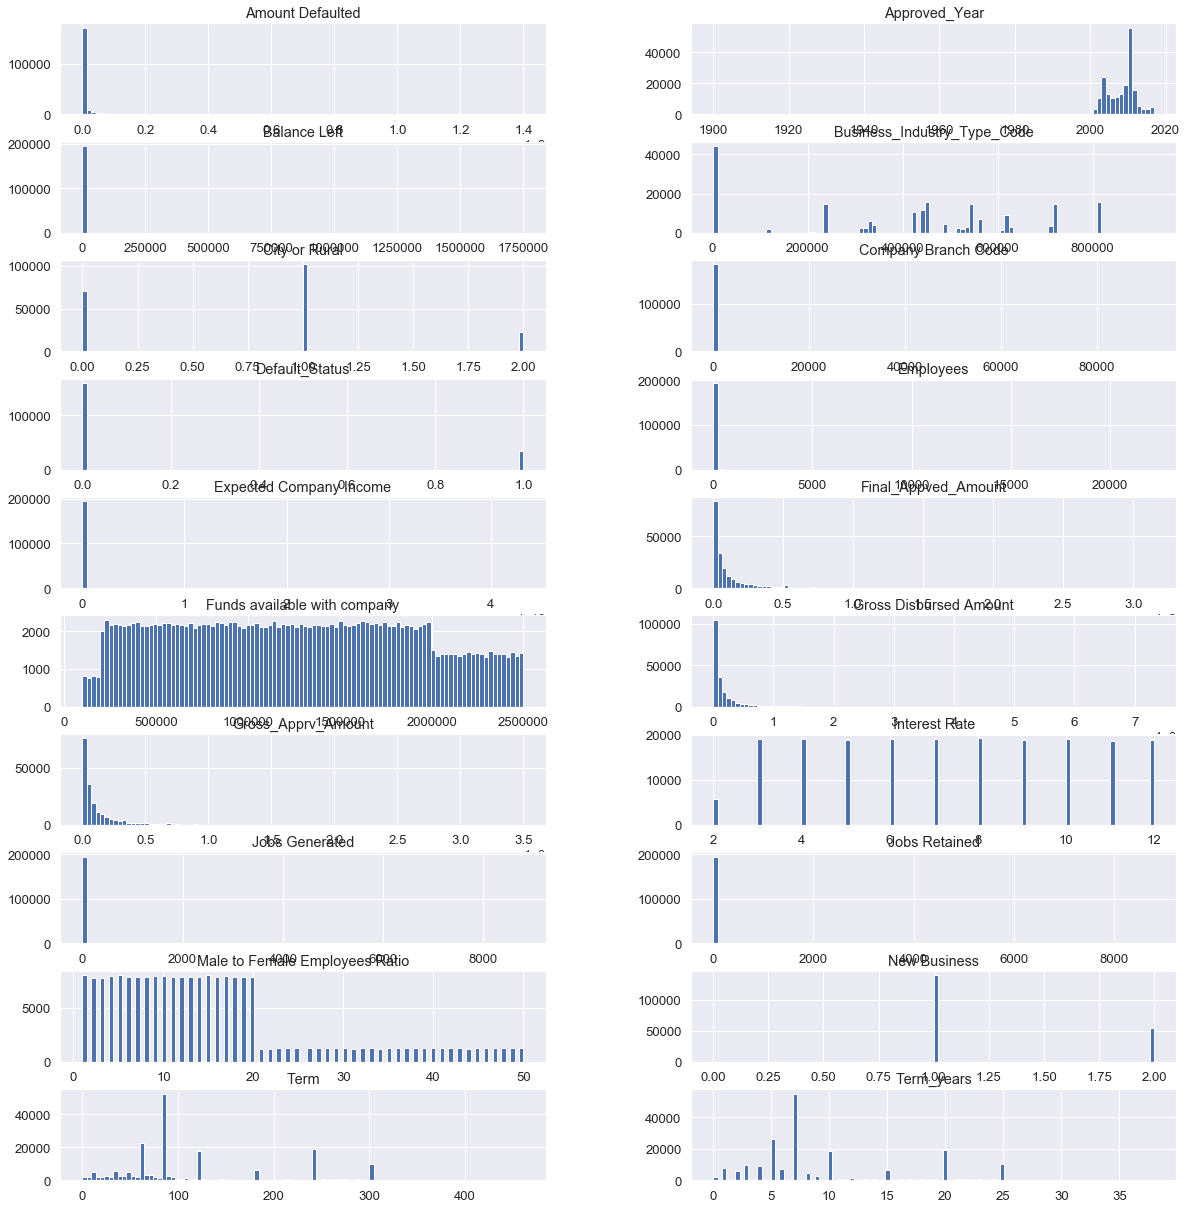

In [874]:
loan[cols].hist(stacked=False, bins=100, figsize=(20,30), layout=(14,2));

In [875]:
loan['Business_Industry_Type_Code'].nunique()

2077

In [876]:
loan['Company Branch Code'].nunique()

1635

In [877]:
loan.columns

Index(['Application ID', 'Bank Masked', 'Bank Type', 'Approved_Timestamp',
       'Name Masked', 'Business Owner State', 'Business_Industry_Type_Code',
       'Approved_Year', 'New Business', 'Term', 'BankState', 'Interest Rate',
       'Employees', 'Gross Disbursed Amount', 'Term_years', 'Jobs Retained',
       'Male to Female Employees Ratio', 'Expected Company Income',
       'Funds available with company', 'Gross_Apprv_Amount',
       'Company Branch Code', 'City or Rural', 'Jobs Generated',
       'Carry-forward Credit', 'Documents Provided', 'Balance Left',
       'Amount Defaulted', 'Final_Appved_Amount', 'Default_Status'],
      dtype='object')

In [878]:
loan.loc[loan['Gross Disbursed Amount']==0,'Gross Disbursed Amount']=int(loan['Gross Disbursed Amount'].mean())

In [879]:
loan[loan['Gross Disbursed Amount']==0]

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount,Default_Status


In [880]:
loan['Default_Disb']=loan['Amount Defaulted']/loan['Gross Disbursed Amount']

In [881]:
loan['Disb_above_app']=(np.abs(loan['Gross Disbursed Amount']-loan['Gross_Apprv_Amount']))/loan['Gross Disbursed Amount']

In [882]:
loan['Disb_above_final_app']=(np.abs(loan['Gross Disbursed Amount']-loan['Final_Appved_Amount']))/loan['Gross Disbursed Amount']

In [883]:
loan['Gross_above_final']=(np.abs(loan['Gross_Apprv_Amount']-loan['Final_Appved_Amount']))/loan['Gross_Apprv_Amount']

In [884]:
loan.drop(loan[loan['Expected Company Income'].isnull()].index,inplace=True)

In [885]:
loan['Inc_Disb']=np.round(loan['Expected Company Income']/loan['Gross Disbursed Amount'],2)
loan['Disb_Fund']=np.round(loan['Gross Disbursed Amount']/loan['Funds available with company'],2)
loan['Inc_Fund']=np.round(loan['Expected Company Income']/loan['Funds available with company'],2)

In [886]:
loan[loan['Approved_Timestamp'].isnull()]['Default_Status'].value_counts()

0    344
1     82
Name: Default_Status, dtype: int64

In [887]:
loan[loan['Approved_Timestamp'].isnull()]['Approved_Year'].value_counts()

1900    426
Name: Approved_Year, dtype: int64

In [888]:
loan['Month']=pd.DatetimeIndex(loan['Approved_Timestamp']).month
loan.loc[loan['Month'].isnull(),'Month']=1.0
#loan['Year-Month']=loan["Approved_Year"].astype(str) + '-'+ loan["Month"].astype(str) 

In [718]:
#loan['Month']

0         12.0
1         11.0
2         11.0
3          4.0
4         11.0
          ... 
195113    10.0
195114     9.0
195115     8.0
195116     9.0
195117     7.0
Name: Month, Length: 195115, dtype: float64

In [719]:
#loan.loc[loan['Month'].isnull(),'Month']=1.0

In [720]:
#loan['Month'].isnull().sum()

0

In [889]:
loan.drop(['Balance Left','Application ID','Bank Masked','Approved_Timestamp','Name Masked'],axis=1,inplace=True)

In [890]:
loan.drop(['Gross Disbursed Amount','Gross_Apprv_Amount','Expected Company Income','Funds available with company','Amount Defaulted','Final_Appved_Amount'],axis=1,inplace=True)

In [891]:
loan.isnull().sum()

Bank Type                          80
Business Owner State                0
Business_Industry_Type_Code         0
Approved_Year                       0
New Business                       36
Term                                0
BankState                           0
Interest Rate                       0
Employees                           0
Term_years                          0
Jobs Retained                       0
Male to Female Employees Ratio      0
Company Branch Code                 0
City or Rural                       0
Jobs Generated                      0
Carry-forward Credit              978
Documents Provided                552
Default_Status                      0
Default_Disb                        0
Disb_above_app                      0
Disb_above_final_app                0
Gross_above_final                   0
Inc_Disb                            0
Disb_Fund                           0
Inc_Fund                            0
Month                               0
dtype: int64

In [892]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(loan, test_size=.30, random_state=1,stratify=loan['Default_Status'])

In [893]:
train.shape

(136580, 26)

In [894]:
train['Default_Status'].value_counts(normalize=True)

0    0.819403
1    0.180597
Name: Default_Status, dtype: float64

In [895]:
test.shape

(58535, 26)

In [896]:
test['Default_Status'].value_counts(normalize=True)

0    0.819407
1    0.180593
Name: Default_Status, dtype: float64

In [897]:
train.isnull().sum()

Bank Type                          55
Business Owner State                0
Business_Industry_Type_Code         0
Approved_Year                       0
New Business                       26
Term                                0
BankState                           0
Interest Rate                       0
Employees                           0
Term_years                          0
Jobs Retained                       0
Male to Female Employees Ratio      0
Company Branch Code                 0
City or Rural                       0
Jobs Generated                      0
Carry-forward Credit              659
Documents Provided                409
Default_Status                      0
Default_Disb                        0
Disb_above_app                      0
Disb_above_final_app                0
Gross_above_final                   0
Inc_Disb                            0
Disb_Fund                           0
Inc_Fund                            0
Month                               0
dtype: int64

In [898]:
train['New Business'].value_counts()

1.0    98161
2.0    38237
0.0      156
Name: New Business, dtype: int64

In [899]:
train['Carry-forward Credit'].value_counts()

N    103035
Y     32886
Name: Carry-forward Credit, dtype: int64

In [900]:
train['Documents Provided'].value_counts()

N    119040
Y     17131
Name: Documents Provided, dtype: int64

In [901]:
train.loc[(train['Bank Type'].isnull()),'Bank Type']='Private'

D:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [902]:
train.loc[(train['New Business'].isnull()),'New Business']=1

In [903]:
train.loc[(train['Carry-forward Credit'].isnull()),'Carry-forward Credit']='N'

In [904]:
train.loc[(train['Documents Provided'].isnull()),'Documents Provided']='N'

In [905]:
train.drop(train[train['Expected Company Income'].isnull()].index,inplace=True)

KeyError: 'Expected Company Income'

In [906]:
train.isnull().sum()

Bank Type                         0
Business Owner State              0
Business_Industry_Type_Code       0
Approved_Year                     0
New Business                      0
Term                              0
BankState                         0
Interest Rate                     0
Employees                         0
Term_years                        0
Jobs Retained                     0
Male to Female Employees Ratio    0
Company Branch Code               0
City or Rural                     0
Jobs Generated                    0
Carry-forward Credit              0
Documents Provided                0
Default_Status                    0
Default_Disb                      0
Disb_above_app                    0
Disb_above_final_app              0
Gross_above_final                 0
Inc_Disb                          0
Disb_Fund                         0
Inc_Fund                          0
Month                             0
dtype: int64

In [907]:
train_dummy = pd.get_dummies(train,drop_first=True)
train_dummy.head()

,Business_Industry_Type_Code,Approved_Year,New Business,Term,Interest Rate,Employees,Term_years,Jobs Retained,Male to Female Employees Ratio,Company Branch Code,...,BankState_Karnataka,BankState_Kerala,BankState_Maharashtra,BankState_Orissa,BankState_Punjab,BankState_Tamil Nadu,BankState_Uttar Pradesh,BankState_Uttarakhand,Carry-forward Credit_Y,Documents Provided_Y
119973,1231,2002,2.0,60,11,10,5,0,1,1,...,0,0,0,0,0,0,0,0,0,1
113982,313042,2005,1.0,84,8,8,7,4,20,0,...,0,0,0,0,0,0,0,0,0,0
93426,446351,2008,2.0,60,8,2,5,0,6,1,...,0,0,0,0,0,0,0,0,0,0
180701,1230,2010,1.0,48,5,8,4,0,9,1,...,0,0,0,0,0,0,1,0,0,1
5097,442541,2012,2.0,84,4,4,7,0,6,1,...,0,0,0,0,0,0,0,0,0,1


In [157]:
#for index in range(0,len(train_dummy)):
#    if ((train_dummy.loc[index,'Amount Defaulted']>0) & (train_dummy.loc[index,'Default_Status']==0)):
#        print('hi')
#        train_dummy.loc[index,'Default_Status']=1
#    elif ((train_dummy.loc[index,'Amount Defaulted']==0) & (train_dummy.loc[index,'Default_Status']==1)):
#        train_dummy.loc[index,'Default_Status']=0

KeyError: 0

In [160]:
#train_dummy.loc[(train_dummy['Amount Defaulted']>0) & (train_dummy['Default_Status']==0),'Default_Status']=1
  
#train_dummy.loc[(train_dummy['Amount Defaulted']==0) & (train_dummy['Default_Status']==1),'Default_Status']=0

In [51]:
from imblearn.over_sampling import SMOTE 

In [255]:
train_dummy['Default_Status'].value_counts(normalize=True)

0    0.819409
1    0.180591
Name: Default_Status, dtype: float64

In [194]:
#oversample = SMOTE()
#X, Y = oversample.fit_resample(train_dummy.drop("Default_Status",axis=1), train_dummy['Default_Status'])

KeyboardInterrupt: 

In [166]:
#Y.value_counts()

1    111914
0    111914
Name: Default_Status, dtype: int64

In [908]:
#without oversampling
X=train_dummy.drop("Default_Status",axis=1)
Y=train_dummy['Default_Status']

In [909]:
test.isnull().sum()

Bank Type                          25
Business Owner State                0
Business_Industry_Type_Code         0
Approved_Year                       0
New Business                       10
Term                                0
BankState                           0
Interest Rate                       0
Employees                           0
Term_years                          0
Jobs Retained                       0
Male to Female Employees Ratio      0
Company Branch Code                 0
City or Rural                       0
Jobs Generated                      0
Carry-forward Credit              319
Documents Provided                143
Default_Status                      0
Default_Disb                        0
Disb_above_app                      0
Disb_above_final_app                0
Gross_above_final                   0
Inc_Disb                            0
Disb_Fund                           0
Inc_Fund                            0
Month                               0
dtype: int64

In [910]:
test['New Business'].value_counts()

1.0    42000
2.0    16465
0.0       60
Name: New Business, dtype: int64

In [911]:
test['Carry-forward Credit'].value_counts()

N    44313
Y    13903
Name: Carry-forward Credit, dtype: int64

In [912]:
test['Documents Provided'].value_counts()

N    50978
Y     7414
Name: Documents Provided, dtype: int64

In [913]:
test.loc[(test['Bank Type'].isnull()),'Bank Type']='Private'

D:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [914]:
test.loc[(test['New Business'].isnull()),'New Business']=1

In [915]:
test.loc[(test['Carry-forward Credit'].isnull()),'Carry-forward Credit']='N'

In [916]:
test.loc[(test['Documents Provided'].isnull()),'Documents Provided']='N'

In [917]:
test_dummy = pd.get_dummies(test,drop_first=True)
test_dummy.head()

,Business_Industry_Type_Code,Approved_Year,New Business,Term,Interest Rate,Employees,Term_years,Jobs Retained,Male to Female Employees Ratio,Company Branch Code,...,BankState_Karnataka,BankState_Kerala,BankState_Maharashtra,BankState_Orissa,BankState_Punjab,BankState_Tamil Nadu,BankState_Uttar Pradesh,BankState_Uttarakhand,Carry-forward Credit_Y,Documents Provided_Y
86692,625641,2011,1.0,60,12,1050,5,0,10,1,...,0,0,0,0,0,0,0,0,0,0
44054,449371,2007,2.0,52,4,2,4,2,10,0,...,0,0,0,0,0,0,0,0,0,0
10931,562951,2007,1.0,37,10,6,3,3,16,1,...,0,0,0,0,0,0,1,0,1,0
171458,445360,2009,2.0,120,8,8,10,0,22,1,...,0,0,0,0,0,0,1,0,0,0
85159,485341,2011,1.0,120,11,20,10,10,20,1,...,0,0,0,0,0,0,0,0,0,0


In [918]:
train_dummy[train_dummy['Expected Company Income']==0]

KeyError: 'Expected Company Income'

In [919]:
X_test=test_dummy.drop('Default_Status',axis=1)
Y_test=test_dummy['Default_Status']

In [508]:
import statsmodels.formula.api as sm

In [509]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [836]:
vif_cal(input_data=X)

Business_Industry_Type_Code  VIF =  1.5


KeyboardInterrupt: 

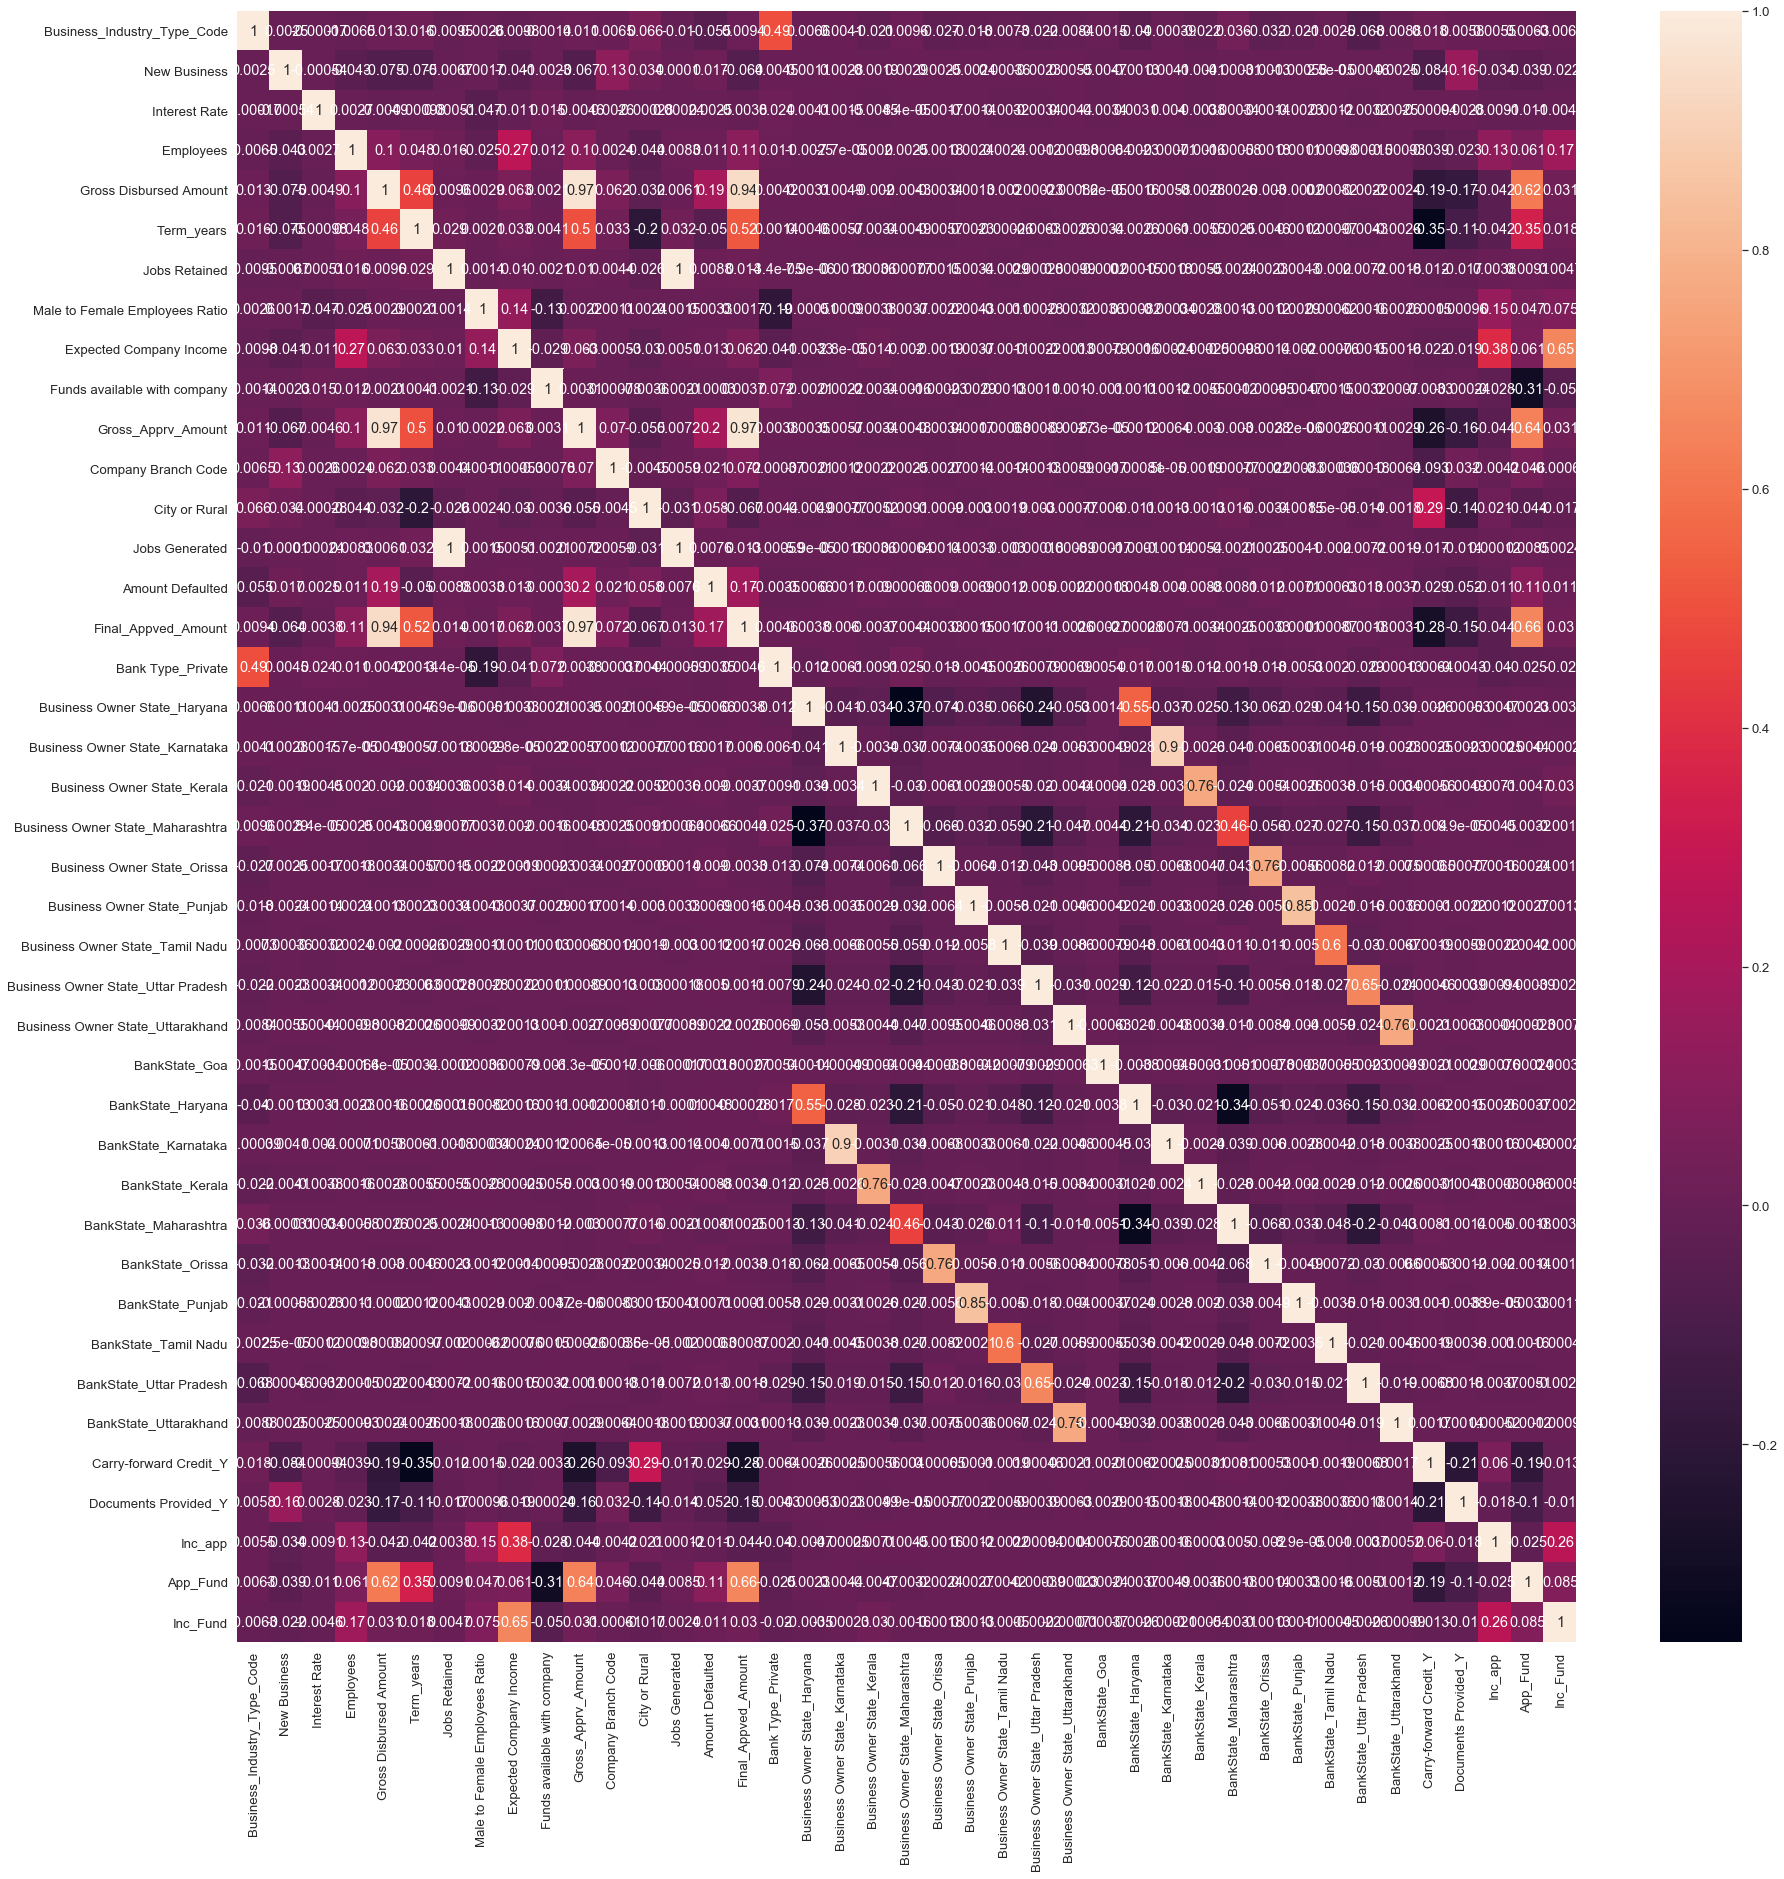

In [145]:
plt.figure(figsize=(30,30))
sns.set(font_scale=1.2)
sns.heatmap(X.corr(),annot=True)

In [146]:
#X.drop(['Gross Disbursed Amount','Jobs Retained','Gross_Apprv_Amount'],axis=1,inplace=True)

In [147]:
#X_test.drop(['Gross Disbursed Amount','Jobs Retained','Gross_Apprv_Amount'],axis=1,inplace=True)

In [148]:
vif_cal(input_data=X)

Business_Industry_Type_Code  VIF =  1.38
New Business  VIF =  1.06
Interest Rate  VIF =  1.0
Employees  VIF =  1.1
Term_years  VIF =  1.56
Male to Female Employees Ratio  VIF =  1.1
Expected Company Income  VIF =  2.02
Funds available with company  VIF =  1.22
Company Branch Code  VIF =  1.03
City or Rural  VIF =  1.14
Jobs Generated  VIF =  1.0
Amount Defaulted  VIF =  1.07
Final_Appved_Amount  VIF =  2.45
Bank Type_Private  VIF =  1.41
Business Owner State_Haryana  VIF =  1.96
Business Owner State_Karnataka  VIF =  5.48
Business Owner State_Kerala  VIF =  2.42
Business Owner State_Maharashtra  VIF =  1.75
Business Owner State_Orissa  VIF =  2.5
Business Owner State_Punjab  VIF =  3.62
Business Owner State_Tamil Nadu  VIF =  1.59
Business Owner State_Uttar Pradesh  VIF =  2.1
Business Owner State_Uttarakhand  VIF =  2.4
BankState_Goa  VIF =  1.0
BankState_Haryana  VIF =  1.74
BankState_Karnataka  VIF =  5.48
BankState_Kerala  VIF =  2.41
BankState_Maharashtra  VIF =  1.61
BankState_Or

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [149]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [920]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1005]:
X.columns

Index(['Business_Industry_Type_Code', 'Approved_Year', 'New Business', 'Term',
       'Interest Rate', 'Employees', 'Term_years', 'Jobs Retained',
       'Male to Female Employees Ratio', 'Company Branch Code',
       'City or Rural', 'Jobs Generated', 'Default_Disb', 'Disb_above_app',
       'Disb_above_final_app', 'Gross_above_final', 'Inc_Disb', 'Disb_Fund',
       'Inc_Fund', 'Month', 'Bank Type_Private',
       'Business Owner State_Haryana', 'Business Owner State_Karnataka',
       'Business Owner State_Kerala', 'Business Owner State_Maharashtra',
       'Business Owner State_Orissa', 'Business Owner State_Punjab',
       'Business Owner State_Tamil Nadu', 'Business Owner State_Uttar Pradesh',
       'Business Owner State_Uttarakhand', 'BankState_Goa',
       'BankState_Haryana', 'BankState_Karnataka', 'BankState_Kerala',
       'BankState_Maharashtra', 'BankState_Orissa', 'BankState_Punjab',
       'BankState_Tamil Nadu', 'BankState_Uttar Pradesh',
       'BankState_Uttarakhand'

In [1061]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [1000],
    "scale_pos_weight":[1],
    "subsample":[0.9],
    "learning_rate":[0.05],
    "gamma":[2],
    "colsample_bytree":[1],
    "colsample_bylevel":[0.7],
    "max_depth":[6]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X, Y)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
#xgb_tuned.fit(X_train, y_train)

In [1062]:
xgb_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1063]:
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X.columns).sort_values('Imp',ascending=False))

                                         Imp
Default_Disb                        0.407898
Approved_Year                       0.085577
Inc_Disb                            0.054232
Inc_Fund                            0.044645
Employees                           0.039064
Business_Industry_Type_Code         0.030741
Male to Female Employees Ratio      0.024573
Term                                0.024474
Bank Type_Private                   0.016464
Term_years                          0.012314
City or Rural                       0.011631
Interest Rate                       0.010303
Jobs Retained                       0.009618
Disb_Fund                           0.009599
New Business                        0.009397
BankState_Karnataka                 0.009075
BankState_Haryana                   0.009017
Business Owner State_Haryana        0.009004
Company Branch Code                 0.008988
Disb_above_final_app                0.008855
Disb_above_app                      0.008817
BankState_

In [1064]:
y_test_predict_prob = xgb_tuned.predict_proba(X_test)

In [923]:
#y_test_predict_prob = xgb.predict_proba(X_test)

In [1065]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
        if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(Y_test,custom_cutoff_train))

0.1 0.7508328350559494
0.2 0.8569573759289314
0.3 0.9228495771760485
0.4 0.9311010506534552
0.5 0.9321773298026822
0.6 0.9324506705389938
0.7 0.9323481677628769
0.8 0.931237721021611
0.9 0.9263688391560605


In [1079]:
custom_prob = 0.3 #defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
    if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[46975   989]
 [ 3527  7044]] 

True Negative: 46975 
False Positives: 989 
False Negatives: 3527 
True Positives: 7044 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     47964
           1       0.88      0.67      0.76     10571

    accuracy                           0.92     58535
   macro avg       0.90      0.82      0.86     58535
weighted avg       0.92      0.92      0.92     58535



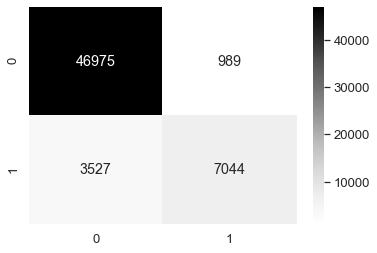

In [1080]:
print(metrics.confusion_matrix(Y_test,custom_cutoff_train),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,custom_cutoff_train)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,custom_cutoff_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,custom_cutoff_train))

0.9324347410140769


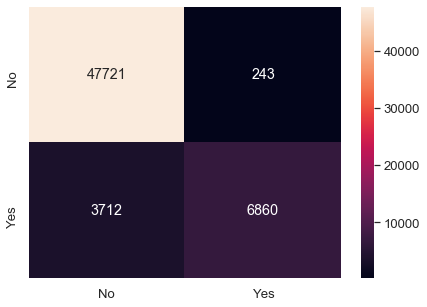

In [261]:

y_predict = xgb_tuned.predict(X_test)
print(xgb_tuned.score(X_test, Y_test))
cm=metrics.confusion_matrix(Y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [262]:
print(metrics.classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     47964
           1       0.97      0.65      0.78     10572

    accuracy                           0.93     58536
   macro avg       0.95      0.82      0.87     58536
weighted avg       0.93      0.93      0.93     58536



AUC: 0.941


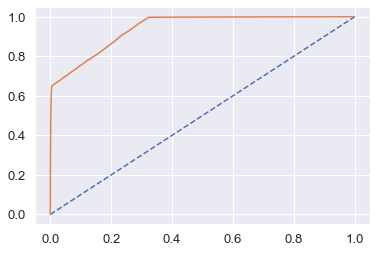

In [263]:
probs = xgb_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [205]:
ss = StandardScaler()

In [206]:
X_scaled = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X_scaled.head()

,Business_Industry_Type_Code,New Business,Interest Rate,Employees,Term_years,Male to Female Employees Ratio,Expected Company Income,Funds available with company,Company Branch Code,City or Rural,...,BankState_Karnataka,BankState_Kerala,BankState_Maharashtra,BankState_Orissa,BankState_Punjab,BankState_Tamil Nadu,BankState_Uttar Pradesh,BankState_Uttarakhand,Carry-forward Credit_Y,Documents Provided_Y
0,0.211511,-0.619526,-0.110136,-0.135980,0.116530,-0.793177,-0.096278,-0.747535,-0.219386,0.377642,...,-0.058700,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807
1,0.543554,-0.619526,-1.116847,0.324161,0.878400,-0.368820,-0.074143,1.494277,-0.219386,-1.168460,...,-0.058700,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807
2,0.094498,-0.619526,-0.110136,-0.007140,-0.797713,-0.623434,-0.090080,-1.152097,-0.219386,0.377642,...,-0.058700,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,1.778334,-0.378807
3,0.188773,-0.619526,-0.445706,0.931547,-0.340591,-1.217534,-0.044925,1.057604,-0.219386,0.377642,...,17.035646,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807
4,0.177363,1.596609,0.896575,-0.154386,-0.492965,-1.217534,-0.097163,0.876275,-0.219463,0.377642,...,-0.058700,-0.041071,1.493229,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807


In [207]:
X_test_scaled = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,Business_Industry_Type_Code,New Business,Interest Rate,Employees,Term_years,Male to Female Employees Ratio,Expected Company Income,Funds available with company,Company Branch Code,City or Rural,...,BankState_Karnataka,BankState_Kerala,BankState_Maharashtra,BankState_Orissa,BankState_Punjab,BankState_Tamil Nadu,BankState_Uttar Pradesh,BankState_Uttarakhand,Carry-forward Credit_Y,Documents Provided_Y
0,0.449855,-0.619526,-0.110136,-0.154386,0.116530,0.140409,-0.097163,0.715336,-0.219386,1.923745,...,-0.0587,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807
1,-0.615265,1.596609,0.225434,-0.135980,-0.645339,-0.878048,-0.096278,1.436237,-0.219386,-1.168460,...,-0.0587,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,2.639868
2,0.210325,-0.619526,1.567715,1.667773,-1.254835,0.395024,-0.009509,1.639330,-0.219386,-1.168460,...,-0.0587,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807
3,-1.509959,-0.619526,0.561004,-0.163588,0.116530,2.856296,-0.045988,-0.264975,-0.219386,-1.168460,...,-0.0587,-0.041071,1.493229,-0.101694,-0.048537,-0.071258,-0.299098,-0.064451,-0.562324,-0.378807
4,-1.509955,1.596609,0.561004,-0.117574,-0.340591,-0.368820,-0.095393,-1.000591,-0.219463,-1.168460,...,-0.0587,-0.041071,-0.669689,-0.101694,-0.048537,-0.071258,3.343388,-0.064451,-0.562324,-0.378807


In [208]:
from sklearn.neural_network import MLPClassifier

In [225]:
param_grid = {
    'hidden_layer_sizes': [900],
    'activation': ['logistic'],
    'learning_rate': ['adaptive'],
    'tol': [0.0001]
}

In [226]:
nncl = MLPClassifier(random_state=1,max_iter=5000)

In [227]:
grid_search_ann = GridSearchCV(estimator = nncl, param_grid = param_grid,cv=10,n_jobs=-1)

In [228]:
grid_search_ann.fit(X_scaled, Y)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=5000, random_state=1),
             n_jobs=-1,
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [900],
                         'learning_rate': ['adaptive'], 'tol': [0.0001]})

In [229]:
y_test_predict_ann = grid_search_ann.predict(X_test_scaled)
y_test_predict_prob_ann=grid_search_ann.predict_proba(X_test_scaled)

In [230]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_test_predict_prob_ann[:,1])):#defining a loop
        if y_test_predict_prob_ann[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(Y_test,custom_cutoff_train))

0.1 0.8945947792811262
0.2 0.8964397977313107
0.3 0.8967131337980047
0.4 0.8968668853355201
0.5 0.8968156348230149
0.6 0.8967473008063414
0.7 0.8967473008063414
0.8 0.8967302173021731
0.9 0.8967131337980047


[[45043  2921]
 [ 3125  7447]] 

True Negative: 45043 
False Positives: 2921 
False Negatives: 3125 
True Positives: 7447 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     47964
           1       0.72      0.70      0.71     10572

    accuracy                           0.90     58536
   macro avg       0.83      0.82      0.82     58536
weighted avg       0.90      0.90      0.90     58536



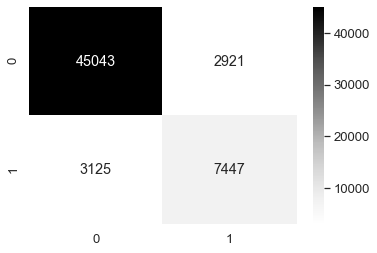

In [231]:
print(metrics.confusion_matrix(Y_test,custom_cutoff_train),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,custom_cutoff_train)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,custom_cutoff_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,custom_cutoff_train))

In [944]:
predict=pd.read_csv("Test_Set_90621.csv")

In [1006]:
predict1=predict.copy()

In [1007]:
predict1.isnull().sum()

Application ID                      0
Bank Masked                        48
Bank Type                          48
Approved_Timestamp                174
Name Masked                         0
Business Owner State                0
Business_Industry_Type_Code         0
Approved_Year                       0
New Business                       15
Term                                0
BankState                          48
Interest Rate                       0
Employees                           0
Gross Disbursed Amount              0
Term_years                          0
Jobs Retained                       0
Male to Female Employees Ratio      0
Expected Company Income             0
Funds available with company        0
Gross_Apprv_Amount                  0
Company Branch Code                 0
City or Rural                       0
Jobs Generated                      0
Carry-forward Credit              412
Documents Provided                247
Balance Left                        0
Amount Defau

In [1008]:
predict1[predict1['Approved_Timestamp'].isnull()]['Approved_Year']

1442     1900
1480     1900
1578     1900
2254     1900
2493     1900
         ... 
79555    1900
80010    1900
80026    1900
80100    1900
83585    1900
Name: Approved_Year, Length: 174, dtype: int64

In [1009]:
#predict1['Month']=pd.DatetimeIndex(predict1['Approved_Timestamp']).month
#predict1['Year-Month']=predict1["Approved_Year"].astype(str) + '-'+ predict1["Month"].astype(str) 

In [1010]:
predict1.loc[predict1['Gross Disbursed Amount']==0,'Gross Disbursed Amount']=int(predict1['Gross Disbursed Amount'].mean())

In [1011]:
predict1[predict1['Gross Disbursed Amount']==0]

,Application ID,Bank Masked,Bank Type,Approved_Timestamp,Name Masked,Business Owner State,Business_Industry_Type_Code,Approved_Year,New Business,Term,...,Funds available with company,Gross_Apprv_Amount,Company Branch Code,City or Rural,Jobs Generated,Carry-forward Credit,Documents Provided,Balance Left,Amount Defaulted,Final_Appved_Amount


In [1012]:
predict1['Default_Disb']=predict1['Amount Defaulted']/predict1['Gross Disbursed Amount']

In [1013]:
predict1['Disb_above_app']=(np.abs(predict1['Gross Disbursed Amount']-predict1['Gross_Apprv_Amount']))/predict1['Gross Disbursed Amount']

In [1014]:
predict1['Disb_above_final_app']=(np.abs(predict1['Gross Disbursed Amount']-predict1['Final_Appved_Amount']))/predict1['Gross Disbursed Amount']

In [1015]:
predict1['Gross_above_final']=(np.abs(predict1['Gross_Apprv_Amount']-predict1['Final_Appved_Amount']))/predict1['Gross_Apprv_Amount']

In [1016]:
predict1['Inc_Disb']=np.round(predict1['Expected Company Income']/predict1['Gross Disbursed Amount'],2)
predict1['Disb_Fund']=np.round(predict1['Gross Disbursed Amount']/predict1['Funds available with company'],2)
predict1['Inc_Fund']=np.round(predict1['Expected Company Income']/predict1['Funds available with company'],2)

In [1017]:
predict1['Month']=pd.DatetimeIndex(predict1['Approved_Timestamp']).month
predict1.loc[predict1['Month'].isnull(),'Month']=1.0

In [1018]:
predict1.drop(['Balance Left','Application ID','Bank Masked','Approved_Timestamp','Name Masked'],axis=1,inplace=True)

In [1019]:
predict1.drop(['Gross Disbursed Amount','Gross_Apprv_Amount','Expected Company Income','Funds available with company','Amount Defaulted','Final_Appved_Amount'],axis=1,inplace=True)

In [1020]:
predict1.isnull().sum()

Bank Type                          48
Business Owner State                0
Business_Industry_Type_Code         0
Approved_Year                       0
New Business                       15
Term                                0
BankState                          48
Interest Rate                       0
Employees                           0
Term_years                          0
Jobs Retained                       0
Male to Female Employees Ratio      0
Company Branch Code                 0
City or Rural                       0
Jobs Generated                      0
Carry-forward Credit              412
Documents Provided                247
Default_Disb                        0
Disb_above_app                      0
Disb_above_final_app                0
Gross_above_final                   0
Inc_Disb                            0
Disb_Fund                           0
Inc_Fund                            0
Month                               0
dtype: int64

In [1021]:
for index,value in predict1['BankState'].iteritems():
    if pd.isnull(value):
        predict1.loc[index,'BankState']=predict1.loc[index,'Business Owner State']

In [1022]:
for index in range(0,len(predict1)):
    if (predict1.loc[index,'BankState']=='0'):
        predict1.loc[index,'BankState']=predict1.loc[index,'Business Owner State']

In [1023]:
predictcols=[]
for feature in predict1.columns: 
    if predict1[feature].dtype == 'object':
        predictcols.append(feature)
predictcols 

['Bank Type',
 'Business Owner State',
 'BankState',
 'Carry-forward Credit',
 'Documents Provided']

Details of Bank Type
----------------------------------------------------------------
Private    130149
Govt        64886
Name: Bank Type, dtype: int64


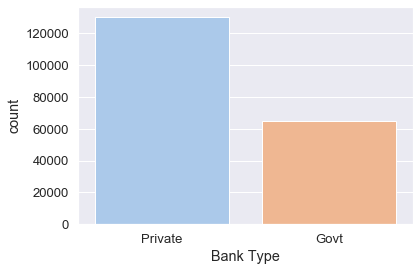

       
Details of Business Owner State
----------------------------------------------------------------
Delhi            58546
Haryana          56420
Maharashtra      48089
Uttar Pradesh    24166
Orissa            2604
Tamil Nadu        2040
Uttarakhand       1293
Karnataka          798
Punjab             616
Kerala             543
Name: Business Owner State, dtype: int64


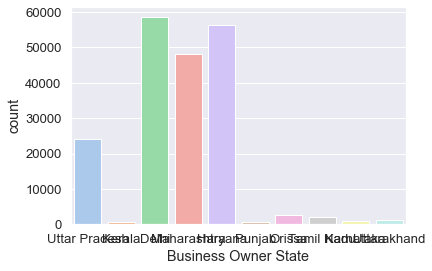

       
Details of BankState
----------------------------------------------------------------
Delhi            74055
Maharashtra      60374
Haryana          39367
Uttar Pradesh    16091
Orissa            1997
Tamil Nadu         961
Uttarakhand        800
Karnataka          671
Punjab             469
Kerala             319
Goa                 11
Name: BankState, dtype: int64


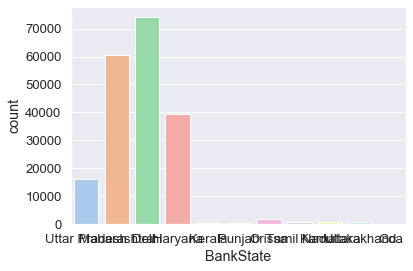

       
Details of Carry-forward Credit
----------------------------------------------------------------
N    147348
Y     46789
Name: Carry-forward Credit, dtype: int64


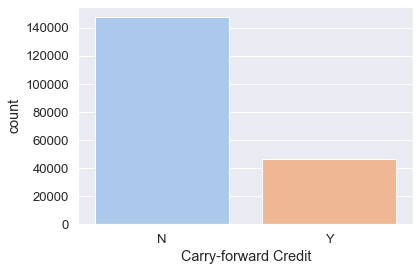

       
Details of Documents Provided
----------------------------------------------------------------
N    170018
Y     24545
Name: Documents Provided, dtype: int64


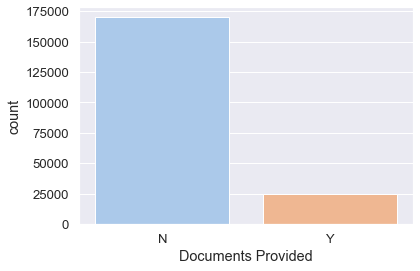

In [1024]:
for x in predictcols:
    univariateAnalysis_category(x)

In [1025]:
predict1.loc[(predict['Bank Type'].isnull()),'Bank Type']='Private'

In [1026]:
predict1['New Business'].value_counts()

1.0    59736
2.0    23786
0.0       86
Name: New Business, dtype: int64

In [1027]:
predict1['Carry-forward Credit'].value_counts()

N    63104
Y    20107
Name: Carry-forward Credit, dtype: int64

In [1028]:
predict1['Documents Provided'].value_counts()

N    72936
Y    10440
Name: Documents Provided, dtype: int64

In [1029]:
predict1.loc[(predict1['New Business'].isnull()),'New Business']=1

In [1030]:
predict1.loc[(predict1['Carry-forward Credit'].isnull()),'Carry-forward Credit']='N'

In [1031]:
predict1.loc[(predict1['Documents Provided'].isnull()),'Documents Provided']='N'

In [1032]:
predict1.isnull().sum()

Bank Type                         0
Business Owner State              0
Business_Industry_Type_Code       0
Approved_Year                     0
New Business                      0
Term                              0
BankState                         0
Interest Rate                     0
Employees                         0
Term_years                        0
Jobs Retained                     0
Male to Female Employees Ratio    0
Company Branch Code               0
City or Rural                     0
Jobs Generated                    0
Carry-forward Credit              0
Documents Provided                0
Default_Disb                      0
Disb_above_app                    0
Disb_above_final_app              0
Gross_above_final                 0
Inc_Disb                          0
Disb_Fund                         0
Inc_Fund                          0
Month                             0
dtype: int64

In [1033]:
predict_dummy = pd.get_dummies(predict1,drop_first=True)
predict_dummy.head()

,Business_Industry_Type_Code,Approved_Year,New Business,Term,Interest Rate,Employees,Term_years,Jobs Retained,Male to Female Employees Ratio,Company Branch Code,...,BankState_Karnataka,BankState_Kerala,BankState_Maharashtra,BankState_Orissa,BankState_Punjab,BankState_Tamil Nadu,BankState_Uttar Pradesh,BankState_Uttarakhand,Carry-forward Credit_Y,Documents Provided_Y
0,562961,2003,2.0,240,8,30,20,0,7,1,...,0,0,0,0,0,0,0,0,0,0
1,1230,2010,1.0,87,8,5,7,0,42,30811,...,0,0,0,0,0,0,0,0,0,1
2,612749,2012,1.0,84,12,1,7,1,10,0,...,0,0,1,0,0,0,0,0,1,0
3,237160,2010,1.0,93,7,49,8,0,4,78760,...,0,0,0,0,0,0,1,0,0,0
4,444351,2004,1.0,240,4,36,20,14,19,1,...,0,0,0,0,0,0,0,0,0,0


In [1034]:
predict_dummy.columns

Index(['Business_Industry_Type_Code', 'Approved_Year', 'New Business', 'Term',
       'Interest Rate', 'Employees', 'Term_years', 'Jobs Retained',
       'Male to Female Employees Ratio', 'Company Branch Code',
       'City or Rural', 'Jobs Generated', 'Default_Disb', 'Disb_above_app',
       'Disb_above_final_app', 'Gross_above_final', 'Inc_Disb', 'Disb_Fund',
       'Inc_Fund', 'Month', 'Bank Type_Private',
       'Business Owner State_Haryana', 'Business Owner State_Karnataka',
       'Business Owner State_Kerala', 'Business Owner State_Maharashtra',
       'Business Owner State_Orissa', 'Business Owner State_Punjab',
       'Business Owner State_Tamil Nadu', 'Business Owner State_Uttar Pradesh',
       'Business Owner State_Uttarakhand', 'BankState_Goa',
       'BankState_Haryana', 'BankState_Karnataka', 'BankState_Kerala',
       'BankState_Maharashtra', 'BankState_Orissa', 'BankState_Punjab',
       'BankState_Tamil Nadu', 'BankState_Uttar Pradesh',
       'BankState_Uttarakhand'

In [1081]:
test_predict= xgb_tuned.predict(predict_dummy)

In [232]:
test_predict= grid_search_ann.predict(predict_dummy)

In [1082]:
test_predict_prob = xgb_tuned.predict_proba(predict_dummy)

In [233]:
test_predict_prob = grid_search_ann.predict_proba(predict_dummy)

In [287]:
#test_predict_prob = xgb.predict_proba(predict_dummy)

In [1158]:
custom_prob = 0.55#defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(test_predict_prob[:,1])):#defining a loop
    if test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

In [1159]:
predict['Default_Status']=custom_cutoff_train

In [1160]:
#predict['Default_Status']=test_predict

In [1161]:
predict=predict[['Application ID','Default_Status']]

In [1162]:
predict.to_csv("result.csv",index=False)